МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Арсений Ашуха, ars.ashuha@gmail.com

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Hastie, The Elements of Statistical Learning, https://goo.gl/k3wfEU, 10 Boosting and Additive Trees 337
- Соколов, Семинары по композиционным методам, https://goo.gl/sn8RyJ, http://goo.gl/ajNTQy

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall <номер_группы> <фамилия>``, к примеру -- ``ML2016_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Чем отличается AdaBoost от XGBoost? Перечислите принципиальные отличия. 

<Ответ>
В XGBoost мы уменьшаем не функцию потерь, а среднеквадратичное отклонение от ее антиградиента, также в XGBoost есть регуляризация, XGBoost умеет оценивать вероятности классов и при построении дерева в XGBoost-e используется критерий, которые зависит от оптимального вектора сдвига.

**Вопрос 2**: Почему говорят, что AdaBoost неустойчив к выбросам?
<Ответ>
Потому что AdaBoost каждый новый алгоритм добавляет по принципу исправления ошибок на всех предыдущих итерациях. Т.е. она дает большие веса объектам, у которых отступ небольшой, отчего результаты на этих объектах имеют наибольший вклад. Таким образом  AdaBoost специализируется на выбросах.

**Вопрос 3**:  В каком пространстве градиентный бустинг совершает градиентный спуск? Какова размерность этого пространства?

<Ответ>
В пространстве ответов алгоритмов. Его размерность -- количество сэмплов в обучающей выборке.


**Вопрос 4**: В чем заключается сокращение шага в градиентном бустинге? Как число итераций, необходимое для сходимости, зависит от размера шага η?

<Ответ>
Здесь $0 < \eta \le 1$. Суть в том, что вес каждого нового алгоритма в композиции мы умножаем на $\eta$, тем самым делая уменьшеный шаг в сторону антиградиента функции потерь. При этом, чем меньше $\eta$, тем большее количество итераций необходимо для настройки градиентного бустинга.

**Вопрос 5**: Что такое стохастический градиентный бустинг?

<Ответ>
Отличие в том, что каждый отдельный алгоритм обучается только на случайной подвыборке, а не на всей выборке.
Это уменьшает время обучения каждого отдельного алгоритма и понижает уровень шума.

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center">Boosting</h1> 

1) Задача 1 
![](./img/task11.png)
![](./img/task12.png)

**<Решение>**

Пусть пень возвращает $sign(x-x_s)$, где $x_s$ — точка, в которой пень установлен, а x — входная точка. 

(Т.е. для элементов справа от себя он вернёт +1, а для элементов слева — -1).

Тогда слева и справа от каждого элемента обучающей выборки ставим по одному пню.
Допустим, у нас есть элемент $x_i$ с правильным ответом $y_i$.
Тогда мы ставим пни $(x_i + \epsilon)$ и $(x_i - \epsilon)$, где $\epsilon$ — некое число, в три раза меньше миниального расстояния между элементами. Первому пню мы ставим коэффициент $y_i/2$, а второму — $-y_i/2$.

Тогда у нас вокруг каждого элемента обучающей выборки есть пара пней.
Если у нас точка лежит вне этой пары, то оба пня в сумме дают ноль (они оба выдают либо +1, либо -1, но после домножения на коэффициенты взаимно уничтожаются).

Если же точка лежит внутри этой пары, то она правее первого пня $((y_i/2)*(+1))$ и левее второго $((-y_i/2)*(-1))$, итого эта пара даёт ей ответ $y_i$.

А все остальные дают ноль

В итоге у нас $2*l$ пней, адовейше переобученных на обучающей выборке, но удовлетворяющих требованиям задачи.

2) Найдите градиент логистичиской функции потерь для фиксированного объекта

**<Решение>**

$$L(y_i, f(x_i)) = \ln(1+exp(-y_i f(x_i)))$$


$$\frac{\partial L(y_i, f(x_i))}{\partial f(x_i)} = \frac{-y_iexp(-y_if(x_i))}{1+exp(-y_if(x_i))}$$

где $f(x_i) = \Sigma_{t=1}^{T-1} \alpha_{t}b_t(x_i)$

Здесь $b_t$ -- элементарные алгоритмы

<h1 align="center">Binary Boosting Implementation</h1> 

Нужно реализовать двухклассовый бустинг с логистичиской функцией потерь. 

Длину шага -- или используйте $1.0*lr$ или подбирайте одномерной оптимизацией;

In [141]:
%pylab inline

import warnings
import numpy as np
import pandas as pd
from copy import deepcopy
from utils import plot_surface
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.base import ClassifierMixin, BaseEstimator
from sklearn.ensemble import GradientBoostingClassifier
from scipy.optimize import minimize_scalar
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection


warnings.simplefilter("ignore")

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [152]:
from copy import deepcopy

class BinaryBoostingClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, base_estimator, n_estimators, lr=0.1):
        self.lr = lr   
        self.n_estimators = n_estimators
        self.base_estimator = base_estimator
    
    def loss_grad(self, original_y, pred_y):
        
        loss_gr = []
        for y,f in zip(original_y, pred_y):
            # here anti-grad
            gr = y*exp(-y*f)/(1+exp(-y*f))
            loss_gr.append(gr)
        
        return loss_gr # Градиент на каждом объекте
    
    def _mse(self, gamma, y, y_pred, y_prev_pred):
        return np.sum((y_prev_pred  + gamma * y_pred - y) ** 2)
        
    def fit(self, X, original_y):
        # Храните базовые алгоритмы тут
        self.estimators_ = []
        self.gammas_ = []
        
        g = 1
        for i in range(self.n_estimators):
            y_prev_pred = self._predict(X)
            grad = self.loss_grad(original_y, y_prev_pred)
            # Настройте базовый алгоритм на градиент, это классификация или регрессия?

            estimator = deepcopy(self.base_estimator)
            estimator.fit(X, grad)
            self.estimators_.append(estimator)
            g = self.lr * minimize_scalar(lambda(x):self._mse(x, original_y, estimator.predict(X), y_prev_pred)).x
            self.gammas_.append(g)
        
        self.out_ = self.outliers(grad)

        return self

    def _predict(self, X):
        
        X = np.array(X)
        if self.estimators_ == []:
            return [0]*len(X)
        else:
            y_pred = np.sum([b.predict(X) for b,g in zip(self.estimators_, self.gammas_)], axis = 0)
            
        return y_pred
    
    def predict(self, X):
        y_pred = sign(self._predict(X))
        return y_pred
    
    def outliers(self, grad):
        out_indx = np.argsort(-np.array(grad))[:10]
        
#         print(len(out_indx)) 
        
        return out_indx # Топ-10 объектов с большим отступом


<h1 align="center">Simple test</h1> 

In [150]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor

X, y = make_classification(n_samples=500, n_features=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2,
                           flip_y=0.05, class_sep=0.8, random_state=241)
y = 2*(y-0.5)

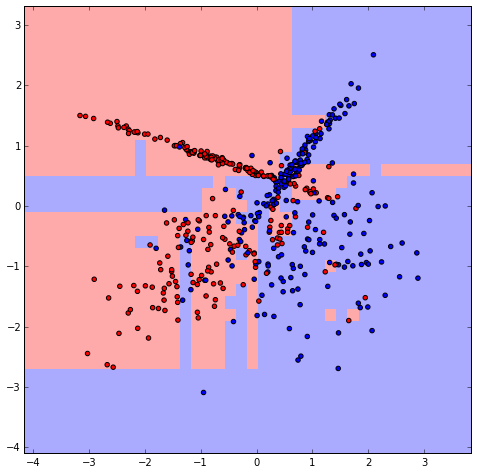

In [153]:

tree = DecisionTreeRegressor(max_depth=5)
clf = BinaryBoostingClassifier(tree, n_estimators=100).fit(X, y)
plot_surface(X, y, clf)

In [154]:
cross_val_score(clf, X, y, cv = 3)

array([ 0.84431138,  0.80239521,  0.73493976])

<h1 align="center">Outliers</h1> 

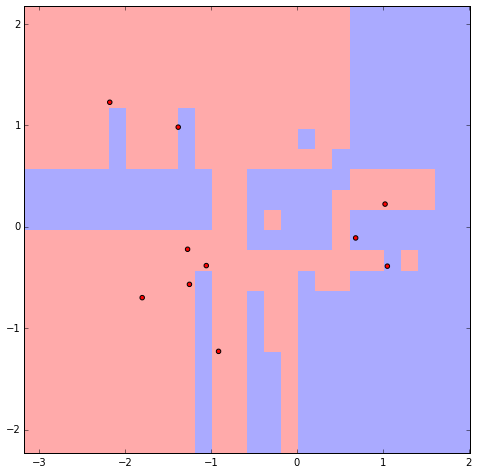

In [155]:
plot_surface(X[clf.out_], y[clf.out_], clf)

<h1 align="center">Adult test</h1> 

In [133]:
!sh ./get_data.sh

sh: ./get_data.sh: No such file or directory


In [156]:
adult = pd.read_csv(
    './data/adult.data', 
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"], 
    header=None, na_values="?")
adult = pd.get_dummies(adult)
adult["Target"] = adult["Target_ >50K"]

In [157]:
X, y = adult[adult.columns[:-3]].values, adult[adult.columns[-1]].values
y = 2*(y-0.5)

In [136]:
GBC = GradientBoostingClassifier()
GBC_scores = cross_val_score(GBC, X, y, scoring = 'f1' , cv = 5)

In [137]:
GBC_scores

array([ 0.67362361,  0.67421476,  0.68847795,  0.68917938,  0.69463207])

In [158]:
tree = DecisionTreeRegressor(max_depth=5)
clf = BinaryBoostingClassifier(tree, n_estimators=100)
BBC_scores = cross_val_score(clf, X, y, scoring='f1', cv = 5)

In [159]:
BBC_scores

array([ 0.69740035,  0.7056338 ,  0.71339779,  0.71608392,  0.70860698])

хэй-хэй-хэй!

<h1 align="center">Text classification</h1> 

- Найдите двухклассовый текстовый датасет (в качестве примера sentiment analysis) или возьмите многоклассовый и классифцируйте один клас против остальных
- Попробуйте бустинг на решающих деревьях, в качестве фичей используйте tf-idf и svd/random_projection/hashing_trick, что работает лучше? Сравните качество и время работы.

Data: https://inclass.kaggle.com/c/si650winter11/data

Sentiment analysis

In [164]:
data = pd.read_table("./data/sentiment_train.txt", sep = "\t", header=None)
data.columns = ['target', 'words']
data.head()

,target,words
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [168]:
data.target = map(lambda x: -1 if x == 0 else x, list(data.target))
data.describe()

,target
count,6918.000000
mean,0.139925
std,0.990234
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [169]:
from sklearn.cross_validation import train_test_split

data_train, data_test = train_test_split(data, test_size=0.3)

# TF-IDF

In [171]:
tf_idf = TfidfVectorizer()
X_train, y_train = tf_idf.fit_transform(data_train.words), data_train.target
X_test, y_test = tf_idf.transform(data_test.words), data_test.target

In [172]:
%%time
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)

CPU times: user 1.1 s, sys: 33.7 ms, total: 1.13 s
Wall time: 1.24 s


In [174]:
from sklearn.metrics import f1_score

f1_score(y_test, clf.predict(X_test.todense()))

0.98617511520737322

# SVD

In [175]:
%%time
svd = TruncatedSVD(n_components=300)
X_train, y_train = svd.fit_transform(tf_idf.transform(data_train.words)), data_train.target
X_test, y_test = svd.transform(tf_idf.transform(data_test.words)), data_test.target

CPU times: user 1.39 s, sys: 198 ms, total: 1.59 s
Wall time: 1.23 s


In [176]:
%%time
clf.fit(X_train, y_train)

CPU times: user 12.6 s, sys: 189 ms, total: 12.8 s
Wall time: 13.2 s


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [177]:
f1_score(y_test, clf.predict(X_test))

0.98453823652319261

# Random Projection

In [178]:
%%time
rand_projector = GaussianRandomProjection(n_components=300)
X_train, y_train = rand_projector.fit_transform(tf_idf.transform(data_train.words)), data_train.target
X_test, y_test = rand_projector.transform(tf_idf.transform(data_test.words)), data_test.target

CPU times: user 250 ms, sys: 53.6 ms, total: 304 ms
Wall time: 307 ms


In [179]:
%%time
clf.fit(X_train, y_train)

CPU times: user 11.7 s, sys: 82.6 ms, total: 11.8 s
Wall time: 11.9 s


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [180]:
f1_score(y_test, clf.predict(X_test))

0.9733777038269551

Видно, что SVD работает лучше, чем рандомное выбрасывание фичей.

Но лучший результат за tf-idf.

<h1 align="center">Random Forest vs Boosting</h1> 

Подберите 2+ датасета как минимум большой и маленький (не использованных в этом дз) и проведите сравнение random forest и градиентного бустинга, используйте реализации алгоритмов из библиотеки sklearn.

- Опишите результаты, почему тот или другой алгоритм на конкретном датасете работает лучше/хуже?
- Как вы настраивали гиперпараметры алгоритмов?
- Как вы проверяли качесво алгоритмов?

не успела

<h1 align="center">Bonus part</h1> 

Это удвоит баллы за дз.

- Реализуйте мультиклассовый бустинг -- проверьте на CIFAR10 + SVD
- Попробуйте различные функции потерь, придумайте несколько своих, удалось ли обойти логистичискую и экспоненциальную?